# 02477 Bayesian Machine Learning - Exercise 1

In [16]:
%matplotlib inline
import pylab as plt
import jax.numpy as jnp
import seaborn as snb

from scipy.stats import binom as binom_dist
from scipy.stats import beta as beta_dist
from scipy.special import beta as beta_fun

snb.set_style('darkgrid')
snb.set(font_scale=1.5)
plt.rcParams['lines.linewidth'] = 3


## 📌 Maximum Likelihood Estimation

<details>
<summary>Click to expand MLE derivation</summary>

### Derivation:

$$
\hat{\theta}_{\text{MLE}} = \frac{y}{N}
$$

</details>


## 🔍 Introduction and purpose of the first exercise 

<details>
<summary>Click to expand the introduction and purpose of the first exercise</summary>
______

The purpose of this exercise is to become familiar with the core components of Bayesian inference: 
> the **prior**, the **likelihood**, **posterior** and **the model evidence**. 


We will also re-cap various ways to summarize distributions, e.g. 

> **mean**, **mode**, **variance**, and **intervals**, and we will look into **how to compute and manipulate probabilities using sampling**. 


We will study these concepts in the context of the **Beta-Binomial model**, which is the "Hello world"-equivalent of Bayesian statistics.

_____

One of the main applications of the Beta-Binomial model is to **estimate proportions**. For example, suppose a website shows a specific ad to $N = 112$ customers and $y = 13$ of those costumers end up clicking on the ad. A common task is then to estimate the click-rate for this ad in order to answer questions like the following:

1) What is the probability that the next customer will click on the ad?

2) What is the probability that the click-rate is below 10%?

3) What is the probability that the click-rate is above 20%?

____________________________

We will see how the Bayesian Beta-Binomial model can be used to answer such questions. Furthermore, we will conclude the exercise by studying a slightly more general version of the problem: Suppose a website has two ads: version A and version B and that version A was shown $N_A$ times and generated $y_A$ clicks, whereas version B was shown $N_B$ times and generated $y_B$ click. What is the probability that the click-rate of version B is larger than click-rate of version A?

</details>

______


### 	📚 **Content**

- Part 1: Maximum likelihood estimation
- Part 2: Bayesian inference
- Part 3: The functional form of Beta distributions
- Part 4: Computing summary statistics and probabilities using sampling
- Part 5: Application to A/B testing


___________________________________


## 🧠 Estimating the proportions using the binomial distribution




In this exercise, we will work with two common families of probabilities distributions: the **Binomial distribution** and the **Beta distribution**. 


<details>
<summary>🔽 Summary of Binomial Distribution </summary>

##### 📊 Binomial Distribution

The Binomial distribution gives the probability of observing exactly $y$ successes in $N$ independent Bernoulli trials, each with success probability $\theta$:

$$
p(y \mid N, \theta) = \binom{N}{y} \theta^y (1 - \theta)^{N - y}
$$

- $N$: number of trials  
- $y$: number of observed successes  
- $\theta$: probability of success on a single trial  
- $\binom{N}{y}$: binomial coefficient = $\frac{N!}{y!(N-y)!}$
- Mean of Binomial: $N\theta$
- Variance of Binomial: $N\theta(1 - \theta)$
- Mode of Binomial (when $N\theta$ is not an integer): $\lfloor N\theta \rfloor$ or $\lceil N\theta \rceil$ (whichever is closer to $N\theta$)
- The Binomial distribution is **conjugate** to the Beta distribution, meaning that if we have a prior belief about $\theta$ modeled as a Beta distribution, the posterior after observing data will also be a Beta distribution.
</details>

---

<details>
<summary>🔽 Summary of Beta Distribution</summary>

##### 🧪 Beta Distribution

The Beta distribution is a continuous distribution defined on the interval $[0, 1]$, commonly used as a **prior** for a probability parameter $\theta$:

$$
\text{Beta}(\theta \mid \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}
$$

- $\alpha, \beta > 0$: shape parameters  
- $\Gamma(\cdot)$: the Gamma function (generalization of factorial)  
- Mean of Beta: $\frac{\alpha}{\alpha + \beta}$  
- Mode of Beta (when $\alpha, \beta > 1$): $\frac{\alpha - 1}{\alpha + \beta - 2}$  
- Variance: $\frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$ 

The Beta distribution is conjugate to the Binomial, which means:
If $\theta \sim \text{Beta}(\alpha, \beta)$ and $y \sim \text{Binomial}(N, \theta)$ then the posterior is also a Beta:  
$$\theta \mid y \sim \text{Beta}(\alpha + y, \beta + N - y)$$

</details>

_________


## 📐 The Binomial Distribution and Maximum Likelihood Estimation


<details>
<summary>Click to expand the introduction to the Binomial distribution</summary>


The **Binomial distribution** models the number of **successes** in $N$ **independent** Bernoulli trials, where each trial has success probability $\theta$.

---

### 🔢 Definition

The probability mass function (PMF) is:

$$
\begin{align*}
p(y|N, \theta) &= \text{Bin}(y|N, \theta) \\
               &= {N \choose y} \theta^y (1 - \theta)^{N - y}
\end{align*}
$$

Where:
- $N$ = number of trials
- $y$ = number of observed successes,  $y \in \left\lbrace 0, 1, \dots, N \right\rbrace$
- $\theta \in [0, 1]$ = probability of success per trial
- ${N \choose y}$ = *binomial coefficient*, pronounced “N choose y”  
  → counts how many ways $y$ items can be chosen from $N$

---

<details>
<summary>📘 Click to expand: Deriving MLE for θ</summary>

### ⚙️ Maximum Likelihood Estimation (MLE)

The **goal**: find $\theta$ that maximizes the probability of the data:

$$
\hat{\theta}_{\text{MLE}} = \arg\max_{\theta} p(y|N, \theta)
$$

For the Binomial distribution, this has a **closed-form solution**:

$$
\hat{\theta}_{\text{MLE}} = \frac{y}{N}
$$

</details>

---

### 📏 Confidence Interval (Frequentist)

You can compute a **95% confidence interval** for $\theta$ using a **Wald approximation**:

$$
\hat{\theta}_{\text{MLE}} \pm 1.96 \sqrt{\frac{\hat{\theta}_{\text{MLE}}(1 - \hat{\theta}_{\text{MLE}})}{N}}
$$

💡 *This interval assumes approximate normality — it’s called the Wald interval.*

---

> ⚠️ **Note:** A **confidence interval** is *not the same* as a **Bayesian credibility interval**.  
> (See Murphy, Section 4.6.6 for more detail.)

---


</details>

## 📐 The Beta Distribution as a Prior for θ

<details>
<summary>Click to expand the introduction to the Beta distribution</summary>



The **Beta distribution** is a flexible prior over variables in the unit interval $[0,1]$. The PDF of the Beta distribution is defined by two shape parameters:

- $a_0 > 0$ and $b_0 > 0$

---

### 📘 Probability Density Function (PDF)

The PDF of the Beta distribution is:

$$
p(\theta \mid a_0, b_0) = \frac{1}{B(a_0, b_0)} \theta^{a_0 - 1}(1 - \theta)^{b_0 - 1}
$$

Where:
- $\theta \in [0,1]$
- $B(a_0, b_0)$ is a **normalization constant** ensuring total probability = 1

---

<details>
<summary>🔽 Click to expand: Normalization constant</summary>

The normalization constant $B(a_0, b_0)$ is defined via the **Beta function**:

$$
B(a_0, b_0) = \int_0^1 \theta^{a_0 - 1}(1 - \theta)^{b_0 - 1} \, d\theta = \frac{\Gamma(a_0)\Gamma(b_0)}{\Gamma(a_0 + b_0)}
$$

Here, $\Gamma(\cdot)$ is the **gamma function** — a generalization of factorial:  
$\Gamma(n) = (n - 1)!$ for positive integers.

🧠 *In practice, $B(a_0, b_0)$ is just a constant w.r.t. $\theta$.*

</details>

---

### 🧾 Functional Form

Since $B(a_0, b_0)$ is constant wrt. $\theta$, we often write:

$$
p(\theta \mid a_0, b_0) \propto \theta^{a_0 - 1}(1 - \theta)^{b_0 - 1}
$$

> 🧩 This **functional form $f(\theta) = \theta^{a-1}(1-\theta)^{b-1}$ for some a,b > 0** makes the Beta distribution a **conjugate prior** for the Binomial.

---

### 📊 Summary Statistics

Let $\theta \sim \text{Beta}(a_0, b_0)$. Then:

- ✅ **Mean** (Expected value):

$$\mathbb{E}\left[\theta\right] = \int_0^1 \theta \, p(\theta|a_0,b_0) \,\text{d} \theta  = \frac{a_0}{a_0+b_0}. \tag{1}$$

- ✅ **Variance**:


$$\mathbb{V}\left[\theta\right] = \int_0^1 \left(\theta - \mathbb{E}\left[\theta\right] \right)^2 \, p(\theta|a_0,b_0) \,\text{d} \theta  = \frac{a_0 b_0}{(a_0+b_0)^2(a_0+b_0+1)}.$$

- ✅ **Mode** (when $a_0, b_0 > 1$):

  $$
  \theta_{\text{mode}} = \frac{a_0 - 1}{a_0 + b_0 - 2}
  $$

> 💡 *The mode is the value of $\theta$ where the distribution peaks.*

---

### 📚 References

For more details:
- Murphy, Section 2.4.1
- Wikipedia articles:
  - [📘 Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution)
  - [📘 Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

</details>

---


## 📐 The Beta-Binomial Model


<details>
<summary>Click to expand the introduction to the Beta-binomial model</summary>

The **Beta-binomial model** is a classic **Bayesian model** for estimating proportions $\theta \in [0, 1]$.

- The **likelihood** is modeled with a **Binomial distribution**
- The **prior** for $\theta$ is a **Beta distribution**

---

### 📘 Model Definition

For a dataset $\mathcal{D} = \{N, y\}$, the model is defined as:

$$
\begin{align*}
\text{Prior:} \quad & p(\theta) = \text{Beta}(\theta \mid a_0, b_0) \\
\text{Likelihood:} \quad & p(y \mid \theta) = \binom{N}{y} \theta^y (1 - \theta)^{N - y} \\
\text{Posterior:} \quad & p(\theta \mid y) = \text{Beta}(\theta \mid a_0 + y, b_0 + N - y)
\end{align*}
$$

---

### 🔠 Notation Notes

> 💡 We follow Murphy’s book conventions throughout.

- $p(\theta)$ = **prior**, sometimes written as $p(\theta \mid a_0, b_0)$ when emphasizing hyperparameters  
- $p(y \mid \theta)$ = **likelihood**, based on Binomial distribution  
- $p(\theta \mid y)$ or $p(\theta \mid \mathcal{D})$ = **posterior**, after observing $y$ out of $N$  
- $\theta$ = model **parameter**  
- $a_0, b_0$ = **hyperparameters** of the Beta prior

---

<details>
<summary>🔽 Click to expand: Full posterior expression</summary>

The posterior is analytically tractable because of conjugacy:  
A Beta prior and a Binomial likelihood yield a **Beta posterior**:

$$
p(\theta \mid y) = \text{Beta}(\theta \mid a_0 + y, \; b_0 + N - y)
$$

🧠 This means we can **update beliefs** about $\theta$ simply by **adding successes/failures** to prior counts.

</details>

---

### 🧩 Summary

- **Prior**: Beta-distributed belief about $\theta$ before observing data
- **Likelihood**: Binomial process generating $y$ successes in $N$ trials
- **Posterior**: Updated Beta distribution after observing $y$

This is a cornerstone of Bayesian inference and provides a closed-form, interpretable update rule.

</details>
________________________

# Part 1:  Maximum likelihood estimation
Assume you want to estimate the probability of success, $\theta \in \left[0, 1\right]$, after observing $y = 1$ success out of $N = 7$ independent Bernoulli trials. That is, your dataset is given by $\mathcal{D} = \left\lbrace N = 7, y = 1\right\rbrace$.

**Task 1.1**: Plot the likelihood $p(y|\theta)$ as a function of $\theta$ for $\theta \in \left[0,1\right]$ and identify the maximum likelihood solution visually/numerically. 

*Hints:*

- *You can either implement the likelihood function yourself using the equation given above, or you can use the implementation from scipy.stats: binom_dist.pmf(y, n, p), where y is the number of success, n is the number of trials and p is the probability of success.*
- *If you don't know how to get started, study the solution.*


_______


# 📐 Part 1: Maximum Likelihood Estimation

---

#### 📊 Context

Suppose we observe:

- $N = 7$ independent Bernoulli trials
- $y = 1$ success

Then our dataset is: $\mathcal{D} = \{ N = 7,\; y = 1 \}$

We want to estimate the **probability of success** $\theta \in [0, 1]$ using **maximum likelihood**.

---

##### 📝 Task 1.1

🔍 **Plot the likelihood** $p(y \mid \theta)$ as a function of $\theta$ over the interval $[0, 1]$.  

🎯 **Goal**: Identify the **maximum likelihood estimate** (MLE) visually **and/or** numerically.

---

### 💡 Hints

- You can **implement the likelihood manually** using:

  $$
  p(y \mid \theta) = \binom{N}{y} \theta^y (1 - \theta)^{N - y}
  $$

- Or you can use **SciPy's built-in function**:

  ```python
  from scipy.stats import binom
  binom.pmf(y, n, p)



When computing the likelihood, we assume that $y$ and $N$ are fixed, and we vary $\theta$. So we write: 
$$\mathcal{L}(\theta) = p(y \mid \theta) = p(y| N = 7, \theta) = \binom{6}{1} \theta^1 (1 - \theta)^{6 - 1}$$

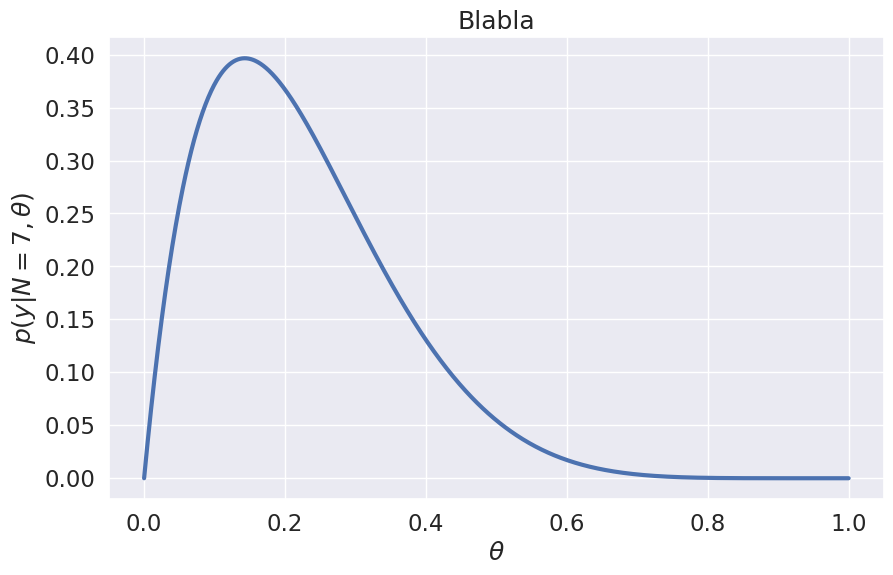

In [18]:
from scipy.stats import binom

# data
N1 = 7
y1 = 1

# make grid for plotting the likelihood p(y|theta) in interval [0, 1]
thetas = jnp.linspace(0, 1, 1000)


def built_in_fun(y, n, p):
    return binom.pmf(y, n, p)


likelihood = built_in_fun(y1, N1, thetas)

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.plot(thetas, likelihood)
plt.ylabel(r'$p(y|N=7, \theta)$')
plt.xlabel(r'$\theta$')
plt.title('Blabla')
plt.show()


**Task 1.2**: Compute the maximum likelihood estimate for $\theta$ and compute a 95% confidence interval using the equations given above.


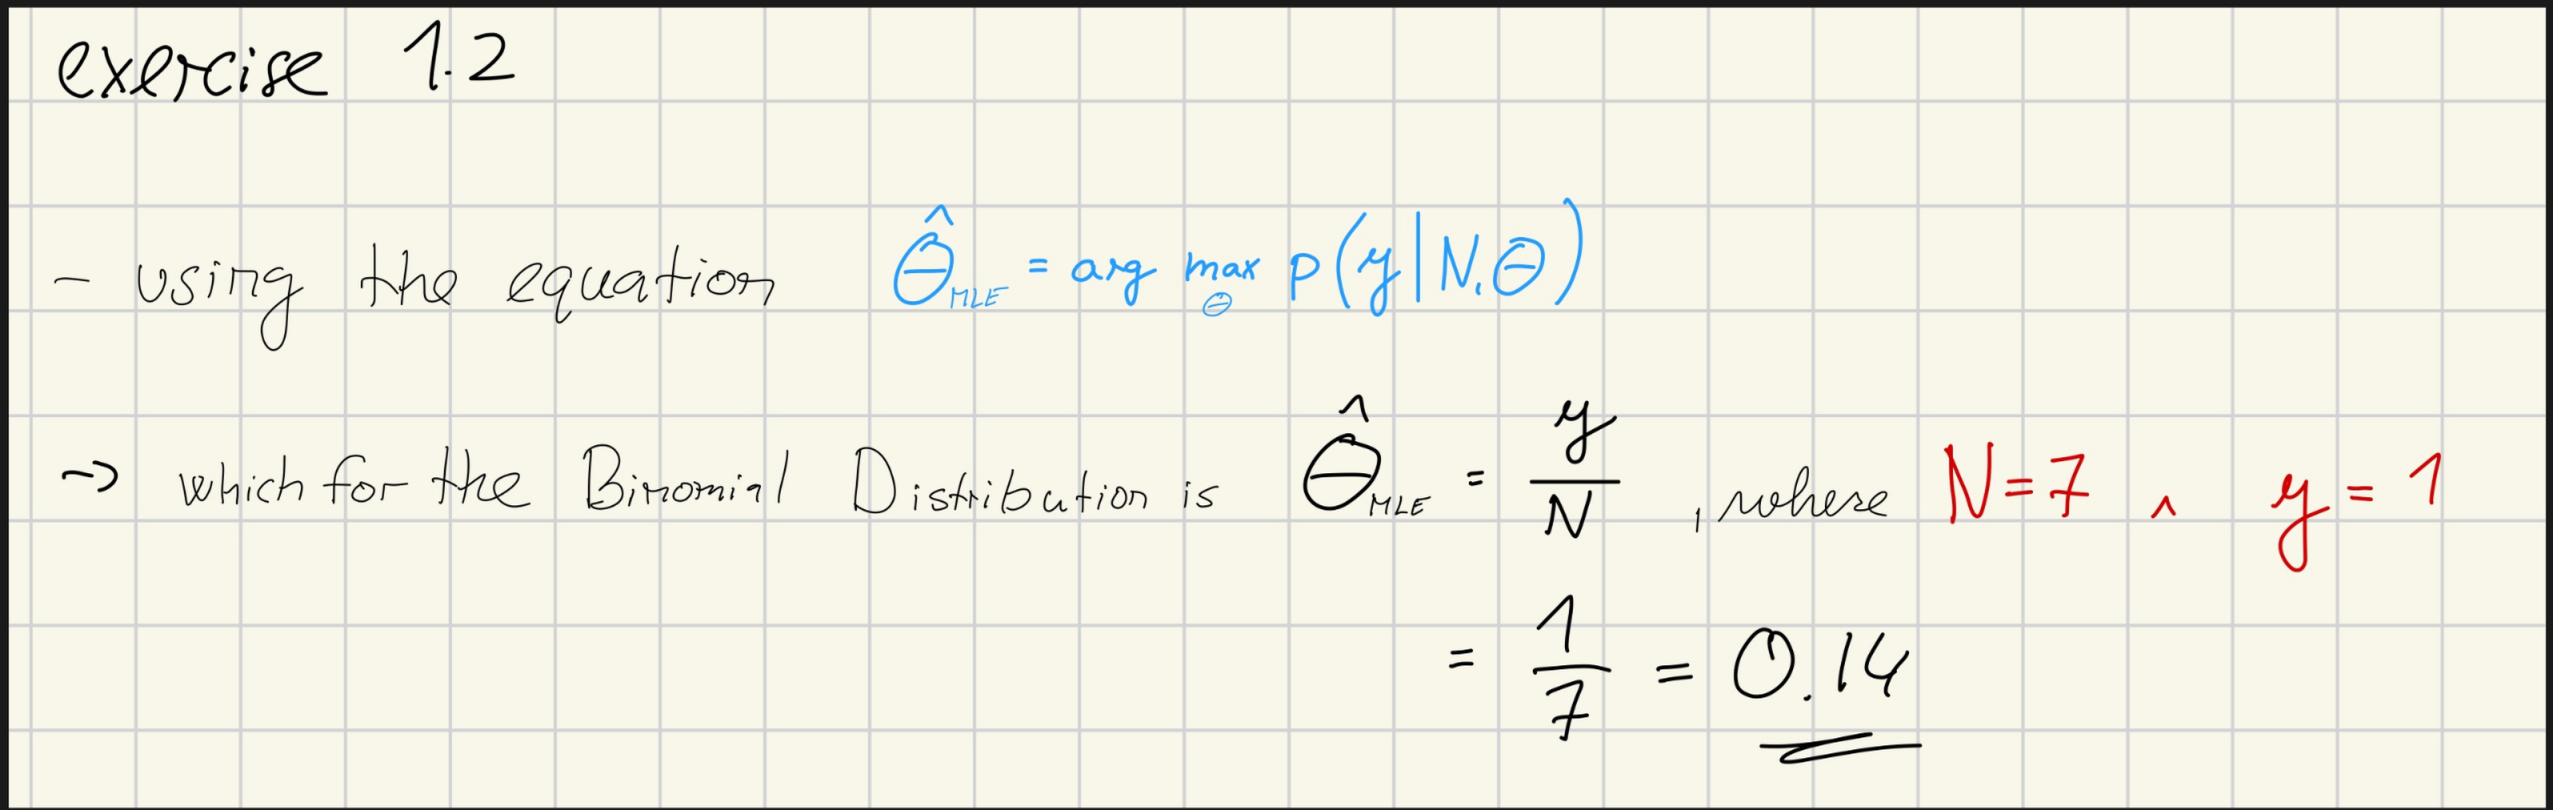



**Task 1.3**: What happens if you had observed $y = 0$ instead of $y = 1$? Does the result seem reasonable?

***Note**: *This is a discussion question, which means that you actively have to experiment with the code and/or reason with the equations to arrive at the relevant conclusions. This also means that we won't provide a specific solution for this task. However, you are more than welcome to check your understanding and your conclusions with the TAs.**

# Part 2:  Bayesian inference

We will now turn our attention towards Bayesian inference for $\theta$. Recall, the core concept of Bayesian inference is that we infer a **full probability distribution**  for $\theta$ rather than just a **point estimate** like $\hat{\theta}_{MLE}$. 
As before, your dataset is given by $\mathcal{D} = \left\lbrace N = 7, y = 1\right\rbrace$, but now we assume a **uniform prior distribution** for $\theta$, i.e. $p(\theta) = \text{Beta}(\theta|a_0,b_0) = 1$ for $a_0 = b_0 = 1$.

**Task 2.1**: Compute the **prior** mean and variance of $\theta$, i.e. the mean and variance of $p(\theta)$.






**Task 2.2**: Compute the parameters $a$ and $b$ of the posterior distribution, i.e. $p(\theta|y)$, using the equations for the Beta-binomial model.






**Task 2.3**: Plot the prior density $p(\theta)$, likelihood $p(y|\theta)$, and the posterior density $p(\theta|y)$ as a function of $\theta$ for $\theta \in \left[0, 1\right]$ in the same figure.

*Hints: the functions beta_dist.pdf and binom_dist.pmf might come in handy*




**Task 2.4**: Compute the **MAP-estimator** for $\theta$ as well as the posterior mean of $\theta$. 

*Hint*: *The MAP-estimator is the mode of the posterior density, i.e. $\theta_{\text{MAP}} = \arg\max\limits_{\theta \in \left[0, 1\right]} p(\theta|y)$*, and can be computed analytically for the Beta-binomoial model.



**Task 2.5**: Compute a 50%, 90% and a 95% posterior credibility interval for $\theta$.

*Hints*:
-  To obtain a 50% posterior credibility interval, our goal is to identify $\theta_1, \theta_2 \in \left[0, 1\right]$ such that  $p(\theta \in \left[\theta_1, \theta_2\right]|\mathcal{D}) = \int _{\theta_1}^{\theta_2} p(\theta|\mathcal{D}) \text{d} \theta  \approx 0.5$
- *scipy.stats.beta.interval* might come in handy for this.




**Task 2.6**: What happens if you had observed $y = 0$ instead of $y = 1$? Does the result seem reasonable?

**Note**: *This is a discussion question, which means that you actively have to experiment with the code and/or reason with the equations to arrive at the relevant conclusions. This also means that we won't provide a specific solution for this task. However, you are more than welcome to check your understanding and your conclusions with the TAs.*


**Task 2.7**: Experiment with different values of $a_0$, $b_0$, $N$, and $y$ to explore how it affects the results (e.g. the plots, MAP, posterior mean and posterior credibility interval).

**Note**: *This is a discussion question, which means that you actively have to experiment with the code and/or reason with the equations to arrive at the relevant conclusions. This also means that we won't provide a specific solution for this task. However, you are more than welcome to check your understanding and your conclusions with the TAs.*




In the next few tasks, we will explore the relationships between the posterior mean and the maximum likelihood estimator.

**Task 2.8** Show that the posterior mean converges to the maximum likelihood estimator $\hat{\theta}_{\text{MLE}} = \frac{y}{N}$ as $N \rightarrow \infty$.

*Hints:*
- *Write the posterior mean as a function of $a_0, b_0, N, y$*
- *Write the number of successes as $y = \hat{\theta}_{MLE} N$ and substitute it into the expression for the posterior mean*
- *If you are stuck, don't hesitate to consult the solution or ask the teachers/teaching assistant for an additional hint*





**Task 2.9** Show that the posterior mean is always between the prior mean, $\theta_0 = \frac{a_0}{a_0 + b_0}$, and the maximum likelihood estimate $\hat{\theta}_{MLE} = \frac{y}{N}$.

Hints:
- Show that the posterior mean is a convex combination of the prior mean $\theta_0$ and the maximum likelihood solution $\hat{\theta}_{\text{MLE}}$, i.e. that the posterior mean can be written as 

$$
\begin{align*}
\mathbb{E}\left[\theta|\mathcal{D}\right] = (1-\lambda) \theta_0 + \lambda \hat{\theta}_{MLE}
\end{align*}
$$
for some $0 \leq \lambda \leq 1$.





# Part 3:  The functional form of Beta distributions

Suppose you are given the expression for a probability density function $p_d(\theta)$ up to a constant, i.e. you are told that $p_d(\theta) =   \frac{1}{Z_d}\theta^{36}(1-\theta)^{41}$, where $Z_d > 0$ is an unknown, but positive constant.


**Task 3.1**: Argue the distribution $p_d$ specified above must be a Beta-distribution $p(\theta|a_d, b_d)$ and identify its parameters $a_d, b_d$.






**Task 3.2**: Compute $Z_d$

*Hint: What is the normalization constant for a Beta distribution?*




We will now use our knowledge of the functional form for Beta densities to compute the denominator in Bayes' theorem, $p(y)$, which is often called the **model evidence** or the **marginal likelihood**. It can be expressed using the **product rule** and the **sum rule** of probability theory:

$$\begin{align*}
p(y) = \underbrace{\int p(y, \theta) \text{d}\theta}_{\text{sum rule}} = \int \underbrace{p(y|\theta)p(\theta)}_{\text{product rule}} \text{d}\theta .
\end{align*}
$$

Later in the course, we will see that this term can be useful for hyperparameter tuning and model selection. For most models of practical interest, the term will be **intractable** because we cannot solve the integral above analytically.  However, for models like the beta-binomial we actually compute this term in closed-form.

**Task 3.3**: Compute the analytical expression for the  model evidence for the Beta-Binomial model

**Hints**:
- Insert the probability mass function for the binomial likelihood and the probability density function for the beta distribution in the integral given above.
- Use linearity of integrals to "move" constants (wrt. $\theta$) outside the integral
- Identify the resulting integral as the integral of the functional form corresponding to a Beta density.



# Part 4:  Computing summary statistics and probabilities using sampling

Once, we have obtained our posterior distribution of interest, we often compute the relevant **summary statistics** using **sampling** when the quantities can not easily be computed analytically. We can often generate a set of samples to represent the distribution and then compute the quantities of interest based on the samples. For example,



In [ ]:
# specify parameters for posterior distribution
a = 6
b = 17

# generate samples
num_samples = 100000
theta_samples = beta_dist.rvs(a=a, b=b, size=num_samples)

# plot
thetas = jnp.linspace(0, 1, 200)
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
ax.plot(thetas, beta_dist.pdf(thetas, a=a, b=b), label='$p(\\theta|y)$')
ax.hist(theta_samples, 50, density=True, label='Histogram of posterior samples of $\\theta$', alpha=0.5, color='g')
ax.set(xlabel='$\\theta$')
ax.legend();

Using the posterior samples $\theta^{(i)} \sim p(\theta|y)$ for $i = 1, \dots, S$, we can easily **estimate** the posterior mean and variance:

In [ ]:
analytical_posterior_mean = a/(a+b)
analytical_posterior_variance = (a*b)/((a+b)**2*(a+b+1))

print(f'E[theta|D] = {jnp.mean(theta_samples):5.4f} (estimated using samples)')
print(f'E[theta|D] = {analytical_posterior_mean:5.4f} (analytical solution)\n')
print(f'V[theta|D] = {jnp.var(theta_samples):5.4f} (estimated using samples)')
print(f'V[theta|D] = {analytical_posterior_variance:5.4f} (analytical solution)')

Sampling is often easy to implement, and hence, it can also be a highly valuable method for verifying analytical results. 

We can also estimate probabilities and credibility intervals using samples as follows. Suppose we want to estimate the posterior probability that $\theta > 0.2$, then we generate $S$ samples from the posterior, i.e. $\theta^{(i)} \sim p(\theta|\mathcal{D})$ for $i = 1, ..., S$, and then simply count the fraction of samples satisfying $\theta^{(i)} < 0.2$. The reason this works is that we can phrase  the probability as an expectation value, which can be estimated using so-called **Monte Carlo samples**:

$$\begin{align*}
P(\theta > 0.2 | \mathcal{D}) = \int_{0.2}^1 p(\theta|\mathcal{D}) \text{d} \theta = \int_0^1 \mathbb{I}\left[\theta > 0.2\right] p(\theta|\mathcal{D}) \text{d}\theta = \mathbb{E}_{p(\theta|\mathcal{D})}\left[\mathbb{I}\left[\theta > 0.2\right]\right] \approx \frac{1}{S}\sum_{i=1}^S \mathbb{I}\left[\theta^{(i)} > 0.2\right],
\end{align*}$$
where $\mathbb{I}\left[\cdot\right]$ is the indicator function yielding $1$ if the condition in the brackets are true, and 0 otherwise. We will talk much more about Monte Carlo sampling later in the course, but for now, we will simply use it as tool to summarize distributions:

In [ ]:
print(f'P[theta > 0.2|D] = {jnp.mean(theta_samples > 0.2):5.4f}\t\t\t(estimated using sampling)\n')

interval = jnp.percentile(theta_samples, jnp.array([2.5, 97.5]))
print(f'95% credibility interval: [{interval[0]:4.3f}, {interval[1]:4.3f}]\t(estimated using sampling)')

Generally, the larger number of samples $S$ used, the more accurate an estimate we will get. Later in the course, we will make this statement much more precise.

**Example**

A friend of yours is building a classifier for a company, and she asks for your help to evaluate the model. On an independent test set of $N = 100$ examples, the classifier made $y = 8$ errors.  It is critical for the company that the error rate is below 10%. Your friend argues that the error rate is $\frac{8}{100} = 0.08$, so there no need to worry, but you are not as convinced because of the rather small test set.

Let $\theta$ represent the error rate and assume a flat Beta-prior, i.e. $a_0 = b_0 = 1$. 

**Task 4.1**: Compute the posterior mean of the error rate $\theta$.






**Task 4.2**: Generate $S = 10000$ samples from the posterior distribution and estimate the posterior probability of the test error being larger than $10%$.  Comment on the result.




# Part 5:  Application to A/B testing



Suppose a website has two ads: version A and version B and that version A was shown $N_A = 947$ times and generated $y_A = 87$ clicks, whereas version B was shown $N_B = 1053$ times and generated $y_B = 101$ click.

We will now put everything together and apply it do a Bayesian analysis of the data using the Beta-binomial model. 

**Task 5.1** Assuming a $\text{Beta}(\theta|2, 2)$ prior for both $\theta_A$ and $\theta_B$, plot the posterior density for both ads.



**Task 5.2** Estimate the mean and a 95%-credibility interval for both ads. Use a $p(\theta) = \text{Beta}(\theta|2, 2)$ prior for both ads.




**Task 5.3** Generate $S = 10000$ posterior samples for both ads and plot the histograms of both sets of samples.




**Task 5.4** Compute posterior samples for the difference of $\theta_D = \theta_B - \theta_A$ and visualize the histogram





**Task 5.5** Compute the posterior mean and 95% credibility interval for $\theta_D$ using the posterior samples



**Task 5.6** What is the posterior probability that the click-rate of version B is larger than click-rate of version A?

